# **Project Overview:**

## Objective: 
Develop a classification model to predict the potability of water based on its physicochemical properties. The goal is to determine whether a given sample of water is safe for consumption (potable) or not, using various features like pH level, hardness, solids, and other water quality metrics.

## Data Description,
The water_potability.csv file contains water quality measurements for 3,276 different water bodies. It includes 9 feature variables, with a target variable called potability (1 indicating the water is potable and 0 indicating it is not).

dataset , https,//www.kaggle.com/datasets/adityakadiwal/water-potability

## Import Libraries

In [40]:
# EDA
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Scalars and Model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.impute import KNNImputer # preprocessing for missing value
from imblearn.over_sampling import SMOTE, ADASYN # preprocessing for oversampling
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import AllKNN



from sklearn.preprocessing import RobustScaler # preprocessing for Standardization
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA # preprocessing for feature reduction

 #Classifiers
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.pipeline import make_pipeline # pipeline
from imblearn.pipeline import Pipeline

from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, precision_score, confusion_matrix, classification_report, RocCurveDisplay



## Load Dataset

In [3]:
data_water = pd.read_csv("../data/water_quality_prediction_data/water_potability.csv", index_col=None)
data_ori = data_water.copy()

## Explanatory Data Analysis (EDA)

In [4]:
# Quck overview of the data
data_water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
data_water.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


### Class Distribution

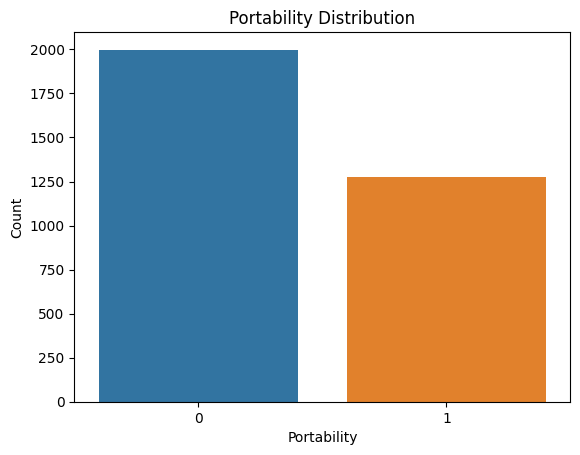

In [6]:
sns.countplot(x='Potability', data=data_water)
plt.title('Portability Distribution')
plt.xlabel('Portability')
plt.ylabel('Count')
plt.show()

## Data Preprocessing
### Handling Missing Values and Duplicate Rows

In [7]:
# Identify a missing data
data_water.isnull().sum()/len(data_water)

ph                 0.149878
Hardness           0.000000
Solids             0.000000
Chloramines        0.000000
Sulfate            0.238400
Conductivity       0.000000
Organic_carbon     0.000000
Trihalomethanes    0.049451
Turbidity          0.000000
Potability         0.000000
dtype: float64

In [8]:
# Validate for duplicate data entries
data_water.duplicated().sum()

0

In [9]:
target = 'Potability'
missing = 'Sulfate'

X = data_water.drop(columns=[target])
y = data_water[target]

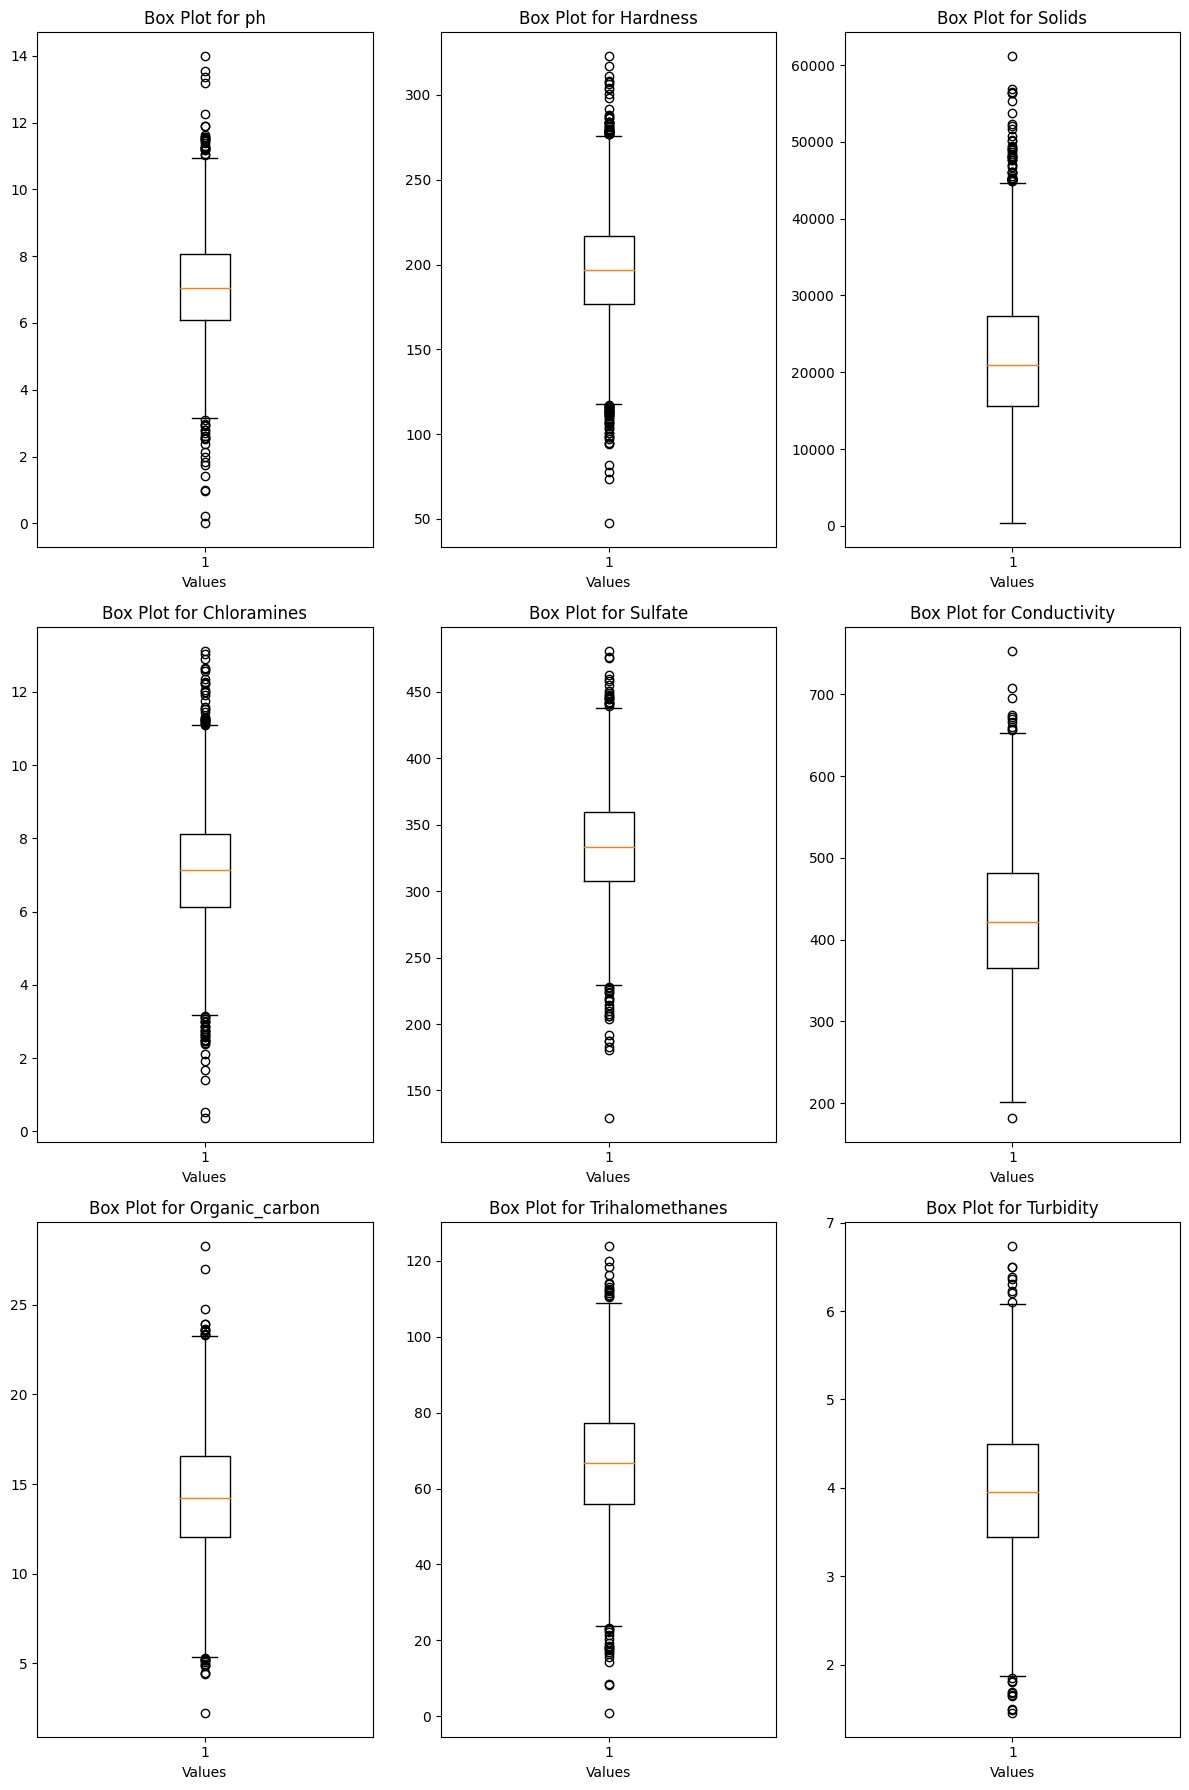

In [10]:
# Set the figure size for the subplots
plt.figure(figsize=(12,18))

# Iterate through the columns and create individual box plots
for i, column in enumerate(X.columns, 1):
    plt.subplot(3, len(X.columns) //3, i)  # Create a subplot for each column
    plt.boxplot(X[column].dropna())
    plt.title(f'Box Plot for {column}')
    plt.xlabel('Values')
    plt.ylabel('')

plt.tight_layout()  # Adjust subplot spacing

plt.show()

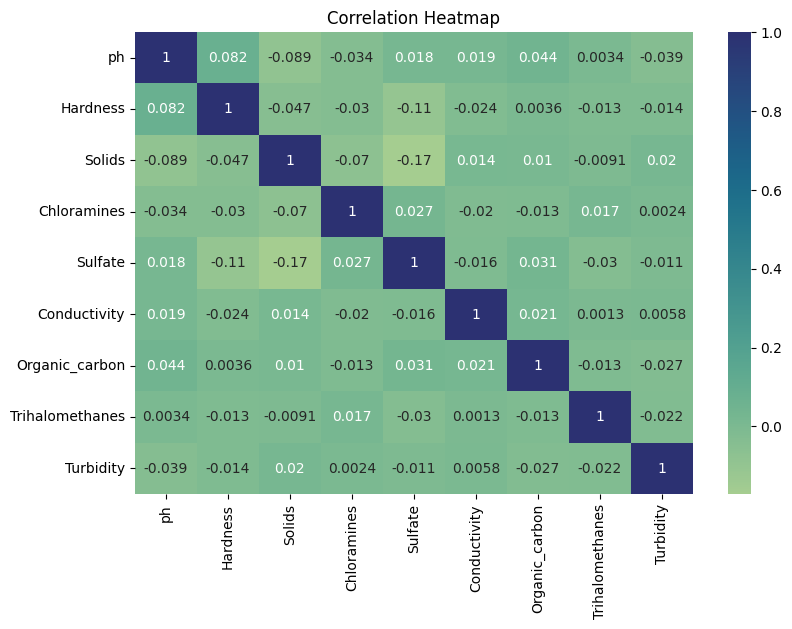

In [11]:

plt.figure(figsize=(9, 6))
sns.heatmap(X.corr(), annot=True, cmap='crest')
plt.title('Correlation Heatmap')

plt.show()

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)

classifiers = [
    ('K Neighbors Classifier', KNeighborsClassifier(n_neighbors =33)),
    ('Decision Tree Classifier', DecisionTreeClassifier(random_state=33)),
    ('Random Forest Classifier', RandomForestClassifier(random_state=33)),
    ('SVC',SVC(random_state=33)),
    ('Gaussian NB',GaussianNB()),
    ('Logistic Regression', LogisticRegression(random_state=33))
]

kf = KFold(n_splits=20, shuffle=True, random_state=33)

for name, model in classifiers:
    pipeline_aa = Pipeline([
        ('scalar', MinMaxScaler()),

        ('imputer',  KNNImputer(missing_values=np.nan)),
        # ('smote', SMOTE()),
        ('PCA',PCA(n_components=8)),
        ('model', model)
    ])

    pipeline_aa.fit(X_train,y_train)
    print(f'{name}Test Score, {pipeline_aa.score(X_test, y_test)}')

    cv_scores = cross_val_score(pipeline_aa, X, y, cv=kf, scoring='accuracy')

    print(f'Cross validation scores for {name}: {cv_scores.mean()}')


K Neighbors ClassifierTest Score, 0.6434676434676435
Cross validation scores for K Neighbors Classifier: 0.6129694747867723
Decision Tree ClassifierTest Score, 0.5763125763125763
Cross validation scores for Decision Tree Classifier: 0.5439454586263655
Random Forest ClassifierTest Score, 0.6312576312576312
Cross validation scores for Random Forest Classifier: 0.6221195570851414
SVCTest Score, 0.6434676434676435
Cross validation scores for SVC: 0.6340303755798294
Gaussian NBTest Score, 0.6117216117216118
Cross validation scores for Gaussian NB: 0.6025998802932816
Logistic RegressionTest Score, 0.6251526251526252
Cross validation scores for Logistic Regression: 0.6099188238814903


##  Reflections: 

This is my first time implementing oversampling techniques in the analysis. Unfortunately, the overall accuracy of the oversampled data was significantly lower than that of the original scaled data. I initially believed that this approach would be beneficial due to the unbalanced nature of the target variable. However, the results suggest a need for deeper exploration and understanding of various balancing methods.

Having only insight into SMOTE as an oversampling method, I opted not to explore other techniques for this project due to my limited familiarity with their applications. Moving forward, I intend to research and test additional balancing methods that may be more appropriate for the dataset.

Furthermore, I will select three classifiers with higher cross-validation scores for a more in-depth analysis. The classifiers chosen for further examination are the Support Vector Classifier (SVC), Random Forest Classifier, and KNeighbors Classifier.

Accuracy score for SVC(random_state=33) on standard scaled data:  0.6434676434676435
Precision score for SVC(random_state=33) on standard scaled data:  0.5700934579439252

[[466  46]
 [246  61]]

              precision    recall  f1-score   support

           0       0.65      0.91      0.76       512
           1       0.57      0.20      0.29       307

    accuracy                           0.64       819
   macro avg       0.61      0.55      0.53       819
weighted avg       0.62      0.64      0.59       819



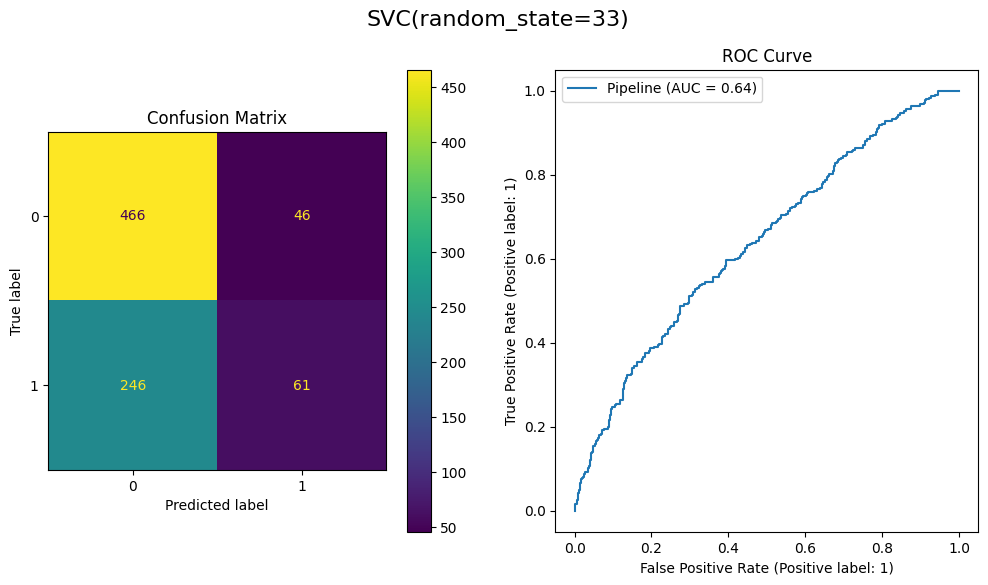



Accuracy score for RandomForestClassifier(random_state=33) on standard scaled data:  0.6312576312576312
Precision score for RandomForestClassifier(random_state=33) on standard scaled data:  0.5149700598802395

[[431  81]
 [221  86]]

              precision    recall  f1-score   support

           0       0.66      0.84      0.74       512
           1       0.51      0.28      0.36       307

    accuracy                           0.63       819
   macro avg       0.59      0.56      0.55       819
weighted avg       0.61      0.63      0.60       819



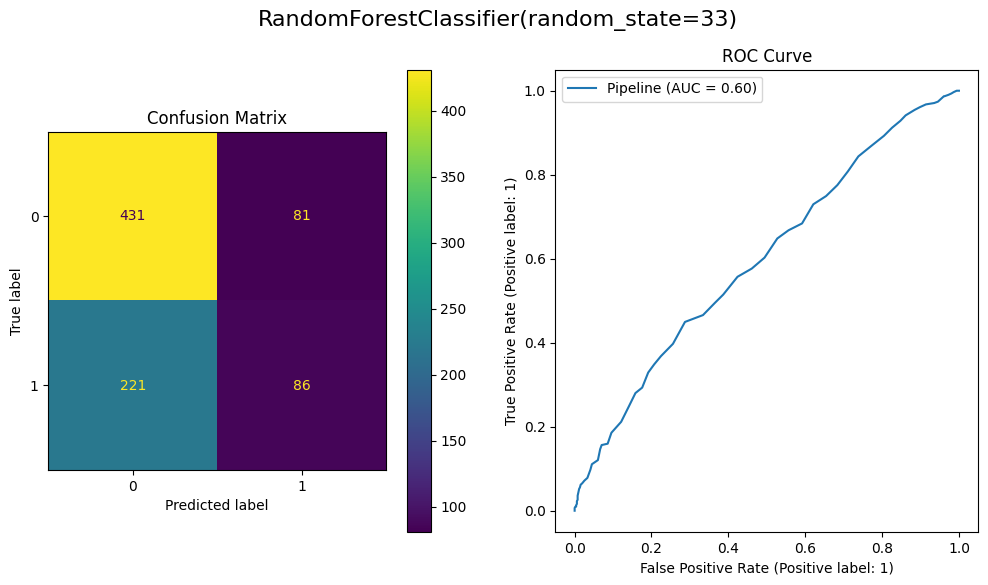



Accuracy score for KNeighborsClassifier(n_neighbors=2) on standard scaled data:  0.5958485958485958
Precision score for KNeighborsClassifier(n_neighbors=2) on standard scaled data:  0.4117647058823529

[[432  80]
 [251  56]]

              precision    recall  f1-score   support

           0       0.63      0.84      0.72       512
           1       0.41      0.18      0.25       307

    accuracy                           0.60       819
   macro avg       0.52      0.51      0.49       819
weighted avg       0.55      0.60      0.55       819



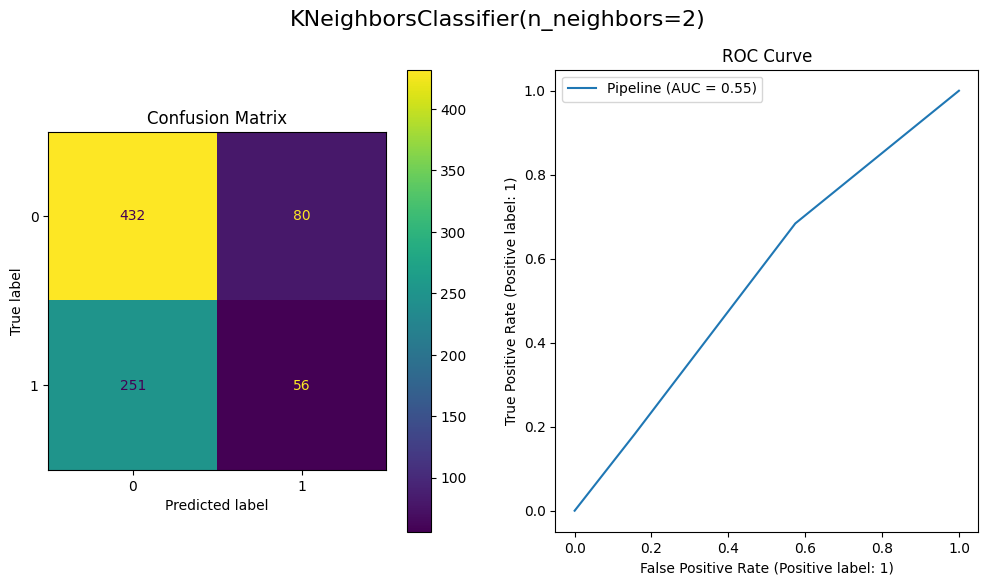

In [60]:

# first check with  logistic regression on standard scaled data

top_classifiers = [
    SVC(random_state=33),
    RandomForestClassifier(random_state=33),
    KNeighborsClassifier(n_neighbors=2)
]

for classifier in top_classifiers:

    pipe = make_pipeline(
        MinMaxScaler(),
        KNNImputer(missing_values=np.nan),
        PCA(n_components=8),
        classifier
        )
    pipe.fit(X_train, y_train)

    y_pred = pipe.predict(X_test)
    print('Accuracy score for' ,classifier, 'on standard scaled data: ', accuracy_score(y_test, y_pred))
    print('Precision score for' ,classifier, 'on standard scaled data: ', precision_score(y_test, y_pred))
    print()
    print(confusion_matrix(y_test, y_pred))
    print()
    print(classification_report(y_test, y_pred))
    # support: The number of occurrences of each label in y_true.

    fig, [ax_con, ax_roc] = plt.subplots(1, 2, figsize=(12, 6))

    fig.suptitle(classifier, fontsize=16)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=pipe.classes_)
    disp_C = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
    disp_C.plot(ax= ax_con)
    ax_con.set_title('Confusion Matrix')

    # Display the ROC Curve
    disp_R = RocCurveDisplay.from_estimator(pipe, X_test, y_test, ax= ax_roc)
    # disp_R.plot(ax= ax_roc) # since RocCurveDisplay return display, don't need to se plot method
    ax_roc.set_title('ROC Curve')
   
   
    plt.legend()
    plt.show()
    print('\n')

## conclusion:  
While Gaussian NB() appears to be the most accurate classification model for this data, the overall performance is still lacking. Further improvement is necessary.

- Conducted a quick Exploratory Data Analysis (EDA) for initial observations of dataset characteristics.
- Utilized an imputer and oversampling method to fill missing data, ensuring a comprehensive dataset.
- Applied a scaler for improved accuracy in data representation.
- These steps, including thorough data exploration, effective handling of missing values, and optimization for accurate predictions, collectively contribute to a robust foundation for the classification model.


